##  Importing the Necessary Libraries
#####  Here we are going to import the libraries that are required to make the necessary analysis and to build the best model

In [3]:
###  Importing The Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px

#Sampling methods
from sklearn.model_selection import train_test_split, cross_val_score

#Oversamplying
#from imblearn.over_sampling import RandomOverSampler

#feature engineering
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

#Feature Selection
from boruta import BorutaPy

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

###  Now we are going to import the necessary test and train file to make the prediction 

In [4]:
train_employees = pd.read_csv(r"C:\Users\suman\Downloads\employee_train.csv")
test_employees = pd.read_csv(r"C:\Users\suman\Downloads\employee_test.csv")

In [3]:
print(f'Train Shape = {train_employees.shape}, Test Shape = {test_employees.shape}')

Train Shape = (1048, 28), Test Shape = (210, 27)


#### By this we can see that in training record of employee record we have (1048 records and 28) features and in the test record of employees we have (210 records and 27 features)

In [4]:
train_employees.head()

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


####  displays the first 5 rows of the train_employees DataFrame to quickly preview its structure and data.

In [5]:
train_employees.columns.to_list()

['S.No',
 'Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

####  This are 28 features we are having in our train data

In [6]:
train_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   S.No                       1048 non-null   int64 
 1   Timestamp                  1048 non-null   object
 2   Age                        1048 non-null   int64 
 3   Gender                     1048 non-null   object
 4   Country                    1048 non-null   object
 5   state                      636 non-null    object
 6   self_employed              1030 non-null   object
 7   family_history             1048 non-null   object
 8   treatment                  1048 non-null   object
 9   work_interfere             812 non-null    object
 10  no_employees               1048 non-null   object
 11  remote_work                1048 non-null   object
 12  tech_company               1048 non-null   object
 13  benefits                   1035 non-null   object
 14  care_opt

#### By this we can see that we are having 26 objects and 2 int dtypes

In [7]:
train_employees[train_employees.duplicated()]

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments


#### By this we can see that we are having the 0 duplicated entrys 

In [8]:
null_count = train_employees.isnull().sum()
null_count[null_count>0]

state               412
self_employed        18
work_interfere      236
benefits             13
wellness_program      4
leave                 4
comments            916
dtype: int64

In [9]:
null_count[null_count>0]/train_employees.shape[0] * 100

state               39.312977
self_employed        1.717557
work_interfere      22.519084
benefits             1.240458
wellness_program     0.381679
leave                0.381679
comments            87.404580
dtype: float64

#### By this we can see that comments, state and work_interfere have mor missing values

<Axes: xlabel='Age'>

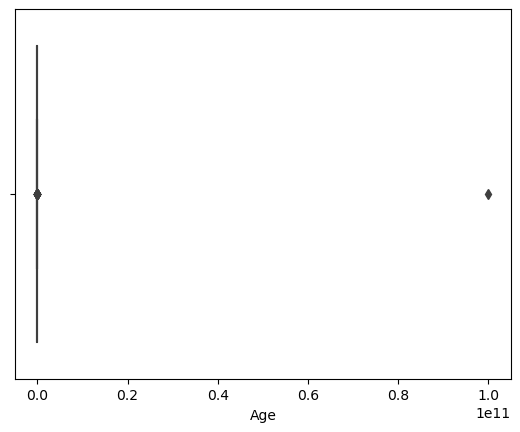

In [10]:
sns.boxplot(x = train_employees.Age)

####  by this we can see that we are having the outliers in the age so we need to remove those ouliers for the proper formation of data

In [11]:
train_employees.Age.max()

99999999999

In [12]:
train_employees.Age.min()

-1726

In [13]:
kpl_IQR=train_employees.Age.quantile(0.75)-train_employees.Age.quantile(0.25)
print('kpl_IQR =',kpl_IQR)
kpl_HE=train_employees.Age.quantile(0.75)+(1.5*kpl_IQR)
print('kpl_HE =',kpl_HE)
kpl_LE=train_employees.Age.quantile(0.25)-(1.5*kpl_IQR)
print('kpl_LE =',kpl_LE)
len(train_employees.Age[train_employees.Age>kpl_HE])

kpl_IQR = 9.0
kpl_HE = 49.5
kpl_LE = 13.5


29

In [14]:
employees_train1=train_employees.copy(deep=True)

In [15]:
train_employees = train_employees[(train_employees['Age'] >= kpl_LE) & (train_employees['Age'] <= kpl_HE)]

In [16]:
train_employees

,S.No,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,1,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,3,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,4,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,5,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,1044,8/29/2014 11:20,26,Male,United States,WA,No,No,Yes,Sometimes,...,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN
1044,1045,8/29/2014 11:22,29,f,United Kingdom,NaN,No,No,Yes,Often,...,Don't know,Maybe,No,Some of them,No,No,Yes,No,Yes,NaN
1045,1046,8/29/2014 11:23,26,Female,Canada,NaN,No,Yes,Yes,Sometimes,...,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN
1046,1047,8/29/2014 11:24,33,Malr,Italy,NaN,No,Yes,Yes,Sometimes,...,Somewhat easy,No,No,Some of them,Yes,No,No,Don't know,No,I suffered of panic attacks and agoraphobia fo...


In [17]:
train_employees.shape

(1015, 28)

In [18]:
train_employees.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        403
self_employed                 18
family_history                 0
treatment                      0
work_interfere               229
no_employees                   0
remote_work                    0
tech_company                   0
benefits                      13
care_options                   0
wellness_program               4
seek_help                      0
anonymity                      0
leave                          3
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     888
dtype: int64

In [19]:
train_employees.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [20]:
train_employees.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)', 'queer',
       'Female (cis)', 'Mail', 'cis male', 'Malr'], dtype=object)

In [21]:
train_employees['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)', 'queer',
       'Female (cis)', 'Mail', 'cis male', 'Malr'], dtype=object)

In [22]:
train_employees.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)', 'queer',
       'Female (cis)', 'Mail', 'cis male', 'Malr'], dtype=object)

In [23]:
import numpy as np

# Define mapping dictionary for Male, Female, Transgender, and Other (which will become np.nan)
gender_map = {
    # Male variants
    'M': 'Male', 'Male': 'Male', 'male': 'Male', 'm': 'Male', 'Male-ish': 'Male', 'maile': 'Male',
    'Cis Male': 'Male', 'Mal': 'Male', 'Male (CIS)': 'Male', 'Guy (-ish) ^_^': 'Male', 'male leaning androgynous': 'Male',
    'Man': 'Male', 'msle': 'Male', 'cis male': 'Male', 'Malr': 'Male', 'Make': 'Male', 'Mail': 'Male',
    'something kinda male?': 'Male',

    # Female variants
    'F': 'Female', 'Female': 'Female', 'female': 'Female', 'Cis Female': 'Female', 'Woman': 'Female', 'f': 'Female',
    'Femake': 'Female', 'woman': 'Female', 'Female ': 'Female', 'cis-female/femme': 'Female', 'Female (cis)': 'Female',

    # Transgender variants
    'Trans-female': 'Transgender', 'Trans woman': 'Transgender', 'Female (trans)': 'Transgender',

    # Other identities -> np.nan
    'queer/she/they': np.nan, 'non-binary': np.nan, 'Nah': np.nan, 'Enby': np.nan, 'fluid': np.nan,
    'Genderqueer': np.nan, 'Androgyne': np.nan, 'Agender': np.nan, 'Neuter': np.nan, 'queer': np.nan
}

# Map the Gender column using the dictionary
train_employees['Gender'] = train_employees['Gender'].map(gender_map)

# Check unique values to confirm the mapping
print(train_employees['Gender'].unique())

['Female' 'Male' 'Transgender' nan]


In [24]:
train_employees['Gender'] = train_employees['Gender'].map(gender_map).fillna('Other')

In [25]:
train_employees.Gender.value_counts(normalize = True) * 100

Gender
Male      78.719212
Female    19.901478
Other      1.379310
Name: proportion, dtype: float64

In [26]:
# Dictionary mapping for classification
employee_size_map = {
    '5-Jan': 'Small',
    '25-Jun': 'Small',
    '26-100': 'Medium',
    '100-500': 'Medium',
    '500-1000': 'Large',
    'More than 1000': 'Large'
}

# Apply mapping directly to 'no_employees' column
train_employees['no_employees'] = train_employees['no_employees'].map(employee_size_map)

In [27]:
train_employees.Age.unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 48, 20, 47, 49],
      dtype=int64)

In [28]:
train_employees.self_employed .value_counts(normalize = True) * 100

self_employed
No     88.264794
Yes    11.735206
Name: proportion, dtype: float64

In [29]:
train_employees.Country.nunique()

40

In [30]:
 train_employees.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [31]:
train_employees.seek_help.value_counts(normalize = True) * 100

seek_help
No            51.330049
Don't know    29.852217
Yes           18.817734
Name: proportion, dtype: float64

In [32]:
train_employees.anonymity.value_counts(normalize = True) * 100

anonymity
Don't know    65.320197
Yes           29.753695
No             4.926108
Name: proportion, dtype: float64

In [33]:
train_employees.leave.value_counts(normalize = True) * 100

leave
Don't know            44.268775
Somewhat easy         21.047431
Very easy             16.798419
Somewhat difficult    10.079051
Very difficult         7.806324
Name: proportion, dtype: float64

In [34]:
train_employees.obs_consequence.value_counts(normalize = True) * 100

obs_consequence
No     86.403941
Yes    13.596059
Name: proportion, dtype: float64

In [35]:
train_employees.family_history.value_counts(normalize = True) * 100

family_history
No     60.985222
Yes    39.014778
Name: proportion, dtype: float64

In [36]:
# Group by 'Age' and 'treatment' and count occurrences
grouped_counts = train_employees.groupby(['family_history', 'treatment']).size().reset_index(name='Count')

# Display all rows without truncation
import pandas as pd

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Print the full grouped dataframe
print(grouped_counts)

  family_history treatment  Count
0             No        No    414
1             No       Yes    205
2            Yes        No    108
3            Yes       Yes    288


In [37]:
train_employees.work_interfere.value_counts(normalize = True) * 100

work_interfere
Sometimes    48.091603
Never        21.628499
Rarely       17.557252
Often        12.722646
Name: proportion, dtype: float64

In [38]:
train_employees.no_employees.value_counts(normalize = True) * 100

no_employees
Medium    37.438424
Small     36.059113
Large     26.502463
Name: proportion, dtype: float64

In [39]:
train_employees.no_employees.unique()

array(['Small', 'Large', 'Medium'], dtype=object)

In [40]:
# Check unique classified values
print(train_employees['no_employees'].unique())

# Frequency count
print(train_employees['no_employees'].value_counts())

['Small' 'Large' 'Medium']
no_employees
Medium    380
Small     366
Large     269
Name: count, dtype: int64


In [41]:
train_employees.care_options.value_counts(normalize = True) * 100

care_options
No          40.788177
Yes         33.793103
Not sure    25.418719
Name: proportion, dtype: float64

In [42]:
# Group by 'Age' and 'treatment' and count occurrences
grouped_counts = train_employees.groupby(['care_options', 'treatment']).size().reset_index(name='Count')

# Display all rows without truncation
import pandas as pd

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Print the full grouped dataframe
print(grouped_counts)

  care_options treatment  Count
0           No        No    253
1           No       Yes    161
2     Not sure        No    157
3     Not sure       Yes    101
4          Yes        No    112
5          Yes       Yes    231


In [43]:
# Group by 'Age' and 'treatment' and count occurrences
grouped_counts = train_employees.groupby(['benefits', 'treatment']).size().reset_index(name='Count')

# Display all rows without truncation
import pandas as pd

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Print the full grouped dataframe
print(grouped_counts)

     benefits treatment  Count
0  Don't know        No    206
1  Don't know       Yes    117
2          No        No    161
3          No       Yes    135
4         Yes        No    145
5         Yes       Yes    238


In [44]:
train_employees.self_employed.value_counts(normalize = True) * 100

self_employed
No     88.264794
Yes    11.735206
Name: proportion, dtype: float64

In [45]:
leave_mapping = {
    "Somewhat easy": "Easy",
    "Very easy": "Easy",
    "Somewhat difficult": "Difficult",
    "Very difficult": "Difficult"
    # "Don't know" is intentionally left out to remain as is
}

# Replace values in 'leave' column
train_employees['leave'] = train_employees['leave'].replace(leave_mapping)

# To verify updated value counts
print(train_employees['leave'].value_counts(normalize=True)*100)

leave
Don't know    44.268775
Easy          37.845850
Difficult     17.885375
Name: proportion, dtype: float64


In [46]:
# Group by 'Age' and 'treatment' and count occurrences
grouped_counts = train_employees.groupby(['tech_company', 'treatment']).size().reset_index(name='Count')

# Display all rows without truncation
import pandas as pd

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Print the full grouped dataframe
print(grouped_counts)

  tech_company treatment  Count
0           No        No     80
1           No       Yes     92
2          Yes        No    442
3          Yes       Yes    401


In [47]:
train_employees.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        403
self_employed                 18
family_history                 0
treatment                      0
work_interfere               229
no_employees                   0
remote_work                    0
tech_company                   0
benefits                      13
care_options                   0
wellness_program               4
seek_help                      0
anonymity                      0
leave                          3
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     888
dtype: int64

In [48]:
train_employees['Date'] = pd.to_datetime(train_employees['Timestamp']).dt.date  

# Check the first few rows
print(train_employees[['Timestamp', 'Date']].head())

         Timestamp        Date
0  8/27/2014 11:29  2014-08-27
1  8/27/2014 11:29  2014-08-27
2  8/27/2014 11:29  2014-08-27
3  8/27/2014 11:29  2014-08-27
4  8/27/2014 11:30  2014-08-27


In [49]:
train_employees['anonymity'] = train_employees['anonymity'].replace('Yes', "Don't know")

In [50]:
train_employees['mental_health_interview'] = train_employees['mental_health_interview'].replace('Yes', "No")

In [51]:
train_employees['phys_health_consequence'] = train_employees['phys_health_consequence'].replace('Yes', "No")

In [52]:
train_employees['wellness_program'] = train_employees['wellness_program'].fillna(train_employees['wellness_program'].mode()[0])

In [53]:
train_employees['leave'] = train_employees['leave'].fillna(train_employees['leave'].mode()[0])

In [54]:
train_employees['benefits'] = train_employees['benefits'].fillna(train_employees['benefits'].mode()[0])

In [55]:
train_employees['work_interfere'] = train_employees['work_interfere'].fillna(train_employees['work_interfere'].mode()[0])

In [56]:
train_employees['self_employed'] = train_employees['self_employed'].fillna(train_employees['self_employed'].mode()[0])

In [57]:
train_employees['Age'] = train_employees['Age'].fillna(train_employees['Age'].mode()[0])

In [58]:
continent_map = {
    'North America': ['United States', 'Canada', 'Mexico', 'Costa Rica'],
    'Europe': ['United Kingdom', 'Bulgaria', 'France', 'Portugal', 'Netherlands', 'Switzerland',
               'Poland', 'Germany', 'Slovenia', 'Austria', 'Ireland', 'Italy', 'Sweden',
               'Latvia', 'Romania', 'Belgium', 'Spain', 'Finland', 'Uruguay', 'Bosnia and Herzegovina',
               'Hungary', 'Croatia', 'Norway', 'Denmark', 'Greece', 'Moldova', 'Czech Republic', 'Georgia'],
    'South America': ['Brazil', 'Colombia', 'Uruguay'],
    'Asia': ['India', 'Russia', 'Israel', 'Singapore', 'Japan', 'Thailand', 'Philippines', 'China'],
    'Africa': ['South Africa', 'Nigeria'],
    'Oceania': ['Australia', 'New Zealand']
}

# Reverse the mapping to country: continent format
country_to_continent = {country: continent for continent, countries in continent_map.items() for country in countries}

# Create a new column for continent
train_employees['continent'] = train_employees['Country'].map(country_to_continent)

# Check the result
print(train_employees[['Country', 'continent']].head())

          Country      continent
0   United States  North America
1   United States  North America
2          Canada  North America
3  United Kingdom         Europe
4   United States  North America


In [59]:
train_employees.continent.value_counts(normalize = True) * 100

continent
North America    67.684729
Europe           27.093596
Oceania           2.266010
Asia              1.871921
South America     0.689655
Africa            0.394089
Name: proportion, dtype: float64

In [60]:
# Define bins and labels
bin = [17, 28, 38, 49]
label = ['Young Workers', 'Mid-Level Workers', 'Senior Workers']

# Create age_group column using pd.cut
train_employees['age_group'] = pd.cut(train_employees.Age, bins=bin, labels=label, right=True)


In [61]:
train_employees.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        403
self_employed                  0
family_history                 0
treatment                      0
work_interfere                 0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     888
Date                           0
continent                      0
age_group 

In [62]:
train_employees.phys_health_consequence                           .value_counts(normalize = True) * 100

phys_health_consequence
No       78.522167
Maybe    21.477833
Name: proportion, dtype: float64

In [63]:
employee_final_train=train_employees[['age_group', 'Gender',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']]

In [64]:
employee_final_train.isnull().sum()

age_group                    0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [65]:
Employee_final_train1 = pd.get_dummies(employee_final_train,drop_first= True).astype('int')
Employee_final_train1

,age_group_Mid-Level Workers,age_group_Senior Workers,Gender_Male,Gender_Other,self_employed_Yes,family_history_Yes,treatment_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,...,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,1,0,0,0,0,0,1,1,0,0,...,1,0,0,1,1,0,0,0,1,0
1,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0,...,0,1,0,1,1,0,1,1,0,0
3,1,0,1,0,0,1,1,1,0,0,...,1,0,0,0,0,0,0,1,0,1
4,1,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,0
5,1,0,1,0,0,1,0,0,0,1,...,0,1,0,1,1,0,0,0,0,0
6,1,0,0,0,0,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
7,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8,0,1,0,0,0,1,1,0,0,1,...,0,1,0,1,1,0,0,1,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [66]:
X = Employee_final_train1.drop('treatment_Yes',axis =1)
y = Employee_final_train1['treatment_Yes']

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report

In [68]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [69]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)
y_train_pred = model1.predict(X_train)
y_test_pred = model1.predict(X_test)
display(confusion_matrix(y_train,y_train_pred))
display(confusion_matrix(y_test,y_test_pred))
print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

array([[301,  72],
       [ 96, 241]], dtype=int64)

array([[114,  35],
       [ 39, 117]], dtype=int64)

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       373
           1       0.77      0.72      0.74       337

    accuracy                           0.76       710
   macro avg       0.76      0.76      0.76       710
weighted avg       0.76      0.76      0.76       710

              precision    recall  f1-score   support

           0       0.75      0.77      0.75       149
           1       0.77      0.75      0.76       156

    accuracy                           0.76       305
   macro avg       0.76      0.76      0.76       305
weighted avg       0.76      0.76      0.76       305



In [70]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_train_pred2 = model2.predict(X_train)
y_test_pred2 = model2.predict(X_test)
display(confusion_matrix(y_train,y_train_pred2))
display(confusion_matrix(y_test,y_test_pred2))
print(classification_report(y_train,y_train_pred2))
print(classification_report(y_test,y_test_pred2))

array([[373,   0],
       [  0, 337]], dtype=int64)

array([[97, 52],
       [58, 98]], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00       337

    accuracy                           1.00       710
   macro avg       1.00      1.00      1.00       710
weighted avg       1.00      1.00      1.00       710

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       149
           1       0.65      0.63      0.64       156

    accuracy                           0.64       305
   macro avg       0.64      0.64      0.64       305
weighted avg       0.64      0.64      0.64       305



In [71]:
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
y_train_pred3 = model3.predict(X_train)
y_test_pred3 = model3.predict(X_test)
display(confusion_matrix(y_train,y_train_pred3))
display(confusion_matrix(y_test,y_test_pred3))
print(classification_report(y_train,y_train_pred3))
print(classification_report(y_test,y_test_pred3))

array([[373,   0],
       [  0, 337]], dtype=int64)

array([[111,  38],
       [ 48, 108]], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       373
           1       1.00      1.00      1.00       337

    accuracy                           1.00       710
   macro avg       1.00      1.00      1.00       710
weighted avg       1.00      1.00      1.00       710

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       149
           1       0.74      0.69      0.72       156

    accuracy                           0.72       305
   macro avg       0.72      0.72      0.72       305
weighted avg       0.72      0.72      0.72       305



In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Define RandomForest model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform Grid Search
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.7309859154929578


In [73]:
# Train a new model with the best parameters
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)

# Fit on training data
best_rf.fit(X_train, y_train)

# Evaluate on test data
accuracy = best_rf.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7540983606557377


In [74]:
best_rf.predict(X_train)

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,

In [75]:
y_train_pred7 = best_rf.predict(X_train)
y_test_pred7 = best_rf.predict(X_test)
display(confusion_matrix(y_train,y_train_pred7))
display(confusion_matrix(y_test,y_test_pred7))
print(classification_report(y_train,y_train_pred7))
print(classification_report(y_test,y_test_pred7))

array([[325,  48],
       [ 68, 269]], dtype=int64)

array([[116,  33],
       [ 42, 114]], dtype=int64)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       373
           1       0.85      0.80      0.82       337

    accuracy                           0.84       710
   macro avg       0.84      0.83      0.84       710
weighted avg       0.84      0.84      0.84       710

              precision    recall  f1-score   support

           0       0.73      0.78      0.76       149
           1       0.78      0.73      0.75       156

    accuracy                           0.75       305
   macro avg       0.75      0.75      0.75       305
weighted avg       0.76      0.75      0.75       305



In [76]:
from sklearn.ensemble import AdaBoostClassifier

model4= AdaBoostClassifier()
model4.fit(X_train,y_train)
y_train_pred4=model4.predict(X_train)
y_test_pred4=model4.predict(X_test)
print(confusion_matrix(y_train,y_train_pred4))
print(confusion_matrix(y_test,y_test_pred4))
print(classification_report(y_train,y_train_pred4))
print(classification_report(y_test,y_test_pred4))

[[299  74]
 [ 95 242]]
[[112  37]
 [ 42 114]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       373
           1       0.77      0.72      0.74       337

    accuracy                           0.76       710
   macro avg       0.76      0.76      0.76       710
weighted avg       0.76      0.76      0.76       710

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       149
           1       0.75      0.73      0.74       156

    accuracy                           0.74       305
   macro avg       0.74      0.74      0.74       305
weighted avg       0.74      0.74      0.74       305



In [77]:
from sklearn.naive_bayes import GaussianNB

model4= GaussianNB()
model4.fit(X_train,y_train)
y_train_pred4=model4.predict(X_train)
y_test_pred4=model4.predict(X_test)
print(confusion_matrix(y_train,y_train_pred4))
print(confusion_matrix(y_test,y_test_pred4))
print(classification_report(y_train,y_train_pred4))
print(classification_report(y_test,y_test_pred4))

[[298  75]
 [142 195]]
[[120  29]
 [ 60  96]]
              precision    recall  f1-score   support

           0       0.68      0.80      0.73       373
           1       0.72      0.58      0.64       337

    accuracy                           0.69       710
   macro avg       0.70      0.69      0.69       710
weighted avg       0.70      0.69      0.69       710

              precision    recall  f1-score   support

           0       0.67      0.81      0.73       149
           1       0.77      0.62      0.68       156

    accuracy                           0.71       305
   macro avg       0.72      0.71      0.71       305
weighted avg       0.72      0.71      0.71       305



In [78]:
from sklearn.svm import SVC
model6= SVC()
model6.fit(X_train,y_train)
y_train_pred6=model6.predict(X_train)
y_test_pred6=model6.predict(X_test)
print(confusion_matrix(y_train,y_train_pred6))
print(confusion_matrix(y_test,y_test_pred6))
print(classification_report(y_train,y_train_pred6))
print(classification_report(y_test,y_test_pred6))

[[331  42]
 [ 68 269]]
[[118  31]
 [ 43 113]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       373
           1       0.86      0.80      0.83       337

    accuracy                           0.85       710
   macro avg       0.85      0.84      0.84       710
weighted avg       0.85      0.85      0.84       710

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       149
           1       0.78      0.72      0.75       156

    accuracy                           0.76       305
   macro avg       0.76      0.76      0.76       305
weighted avg       0.76      0.76      0.76       305



In [79]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Perform Grid Search
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_test, y_test)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1.0}
Best Score: 0.7672131147540984


In [80]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Perform Grid Search on the training set
grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1, verbose=1)

# Ensure you use the training data, not the test data
grid_search.fit(X_train, y_train)

# Display best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best Score: 0.7338028169014084


In [81]:
best_XGB = XGBClassifier(**grid_search.best_params_, random_state=42)

# Fit on training data
best_XGB.fit(X_train, y_train)

# Evaluate on test data
accuracy = best_XGB.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.760655737704918


In [82]:
y_train_pred8 = best_XGB.predict(X_train)
y_test_pred8 = best_XGB.predict(X_test)
display(confusion_matrix(y_train,y_train_pred8))
display(confusion_matrix(y_test,y_test_pred8))
print(classification_report(y_train,y_train_pred8))
print(classification_report(y_test,y_test_pred8))

array([[302,  71],
       [ 80, 257]], dtype=int64)

array([[113,  36],
       [ 37, 119]], dtype=int64)

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       373
           1       0.78      0.76      0.77       337

    accuracy                           0.79       710
   macro avg       0.79      0.79      0.79       710
weighted avg       0.79      0.79      0.79       710

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       149
           1       0.77      0.76      0.77       156

    accuracy                           0.76       305
   macro avg       0.76      0.76      0.76       305
weighted avg       0.76      0.76      0.76       305



In [83]:
for i in employee_final_train.columns:
    print(f"Column: {i}")
    print(employee_final_train[i].unique())
    print()

Column: age_group
['Mid-Level Workers', 'Senior Workers', 'Young Workers']
Categories (3, object): ['Young Workers' < 'Mid-Level Workers' < 'Senior Workers']

Column: Gender
['Female' 'Male' 'Other']

Column: self_employed
['No' 'Yes']

Column: family_history
['No' 'Yes']

Column: treatment
['Yes' 'No']

Column: work_interfere
['Often' 'Rarely' 'Never' 'Sometimes']

Column: no_employees
['Small' 'Large' 'Medium']

Column: remote_work
['No' 'Yes']

Column: tech_company
['Yes' 'No']

Column: benefits
['Yes' "Don't know" 'No']

Column: care_options
['Not sure' 'No' 'Yes']

Column: wellness_program
['No' "Don't know" 'Yes']

Column: seek_help
['Yes' "Don't know" 'No']

Column: anonymity
["Don't know" 'No']

Column: leave
['Easy' "Don't know" 'Difficult']

Column: mental_health_consequence
['No' 'Maybe' 'Yes']

Column: phys_health_consequence
['No' 'Maybe']

Column: coworkers
['Some of them' 'No' 'Yes']

Column: supervisor
['Yes' 'No' 'Some of them']

Column: mental_health_interview
['No' '

In [84]:
employee_final_train.columns
   

Index(['age_group', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [85]:
employee_final_train.columns

Index(['age_group', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [86]:
train_employees.columns

Index(['S.No', 'Timestamp', 'Age', 'Gender', 'Country', 'state',
       'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments', 'Date',
       'continent', 'age_group'],
      dtype='object')

In [87]:
train_employees.Age.unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 48, 20, 47, 49],
      dtype=int64)

In [88]:
train_employees.age_group.unique()

['Mid-Level Workers', 'Senior Workers', 'Young Workers']
Categories (3, object): ['Young Workers' < 'Mid-Level Workers' < 'Senior Workers']

In [89]:
for col in employee_final_train.columns:
    print(f"Column: {col}")
    print(employee_final_train[col].unique())
    print("-" * 50) 

Column: age_group
['Mid-Level Workers', 'Senior Workers', 'Young Workers']
Categories (3, object): ['Young Workers' < 'Mid-Level Workers' < 'Senior Workers']
--------------------------------------------------
Column: Gender
['Female' 'Male' 'Other']
--------------------------------------------------
Column: self_employed
['No' 'Yes']
--------------------------------------------------
Column: family_history
['No' 'Yes']
--------------------------------------------------
Column: treatment
['Yes' 'No']
--------------------------------------------------
Column: work_interfere
['Often' 'Rarely' 'Never' 'Sometimes']
--------------------------------------------------
Column: no_employees
['Small' 'Large' 'Medium']
--------------------------------------------------
Column: remote_work
['No' 'Yes']
--------------------------------------------------
Column: tech_company
['Yes' 'No']
--------------------------------------------------
Column: benefits
['Yes' "Don't know" 'No']
--------------------

In [90]:
test_employees.columns.to_list()

['S.No',
 'Timestamp',
 'Age',
 'Gender',
 'Country',
 'state',
 'self_employed',
 'family_history',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence',
 'comments']

In [91]:
test_employees.isnull().sum()

S.No                           0
Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        103
self_employed                  0
family_history                 0
work_interfere                28
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       3
care_options                   0
wellness_program               2
seek_help                      0
anonymity                      0
leave                          5
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     178
dtype: int64

In [92]:
test_employees['Date'] = pd.to_datetime(test_employees['Timestamp']).dt.date  

# Check the first few rows
print(test_employees[['Timestamp', 'Date']].head())

         Timestamp        Date
0  8/29/2014 11:32  2014-08-29
1  8/29/2014 11:32  2014-08-29
2  8/29/2014 11:33  2014-08-29
3  8/29/2014 11:34  2014-08-29
4  8/29/2014 11:36  2014-08-29


In [5]:
test_employees['work_interfere'] = test_employees['work_interfere'].fillna(test_employees['work_interfere'].mode()[0])

In [6]:
test_employees['phys_health_consequence'] = test_employees['phys_health_consequence'].replace('Yes', "No")

In [7]:
test_employees['anonymity'] = test_employees['anonymity'].replace('Yes', "Don't know")

In [8]:
test_employees['mental_health_interview'] = test_employees['mental_health_interview'].replace('Yes', "No")

In [9]:
test_employees['wellness_program'] = test_employees['wellness_program'].fillna(test_employees['wellness_program'].mode()[0])

In [10]:
test_employees['benefits'] = test_employees['benefits'].fillna(test_employees['benefits'].mode()[0])

In [11]:
test_employees['leave'] = test_employees['leave'].fillna(test_employees['leave'].mode()[0])

In [12]:
test_employees.Age.unique()

array([39, 26, 23, 35, 36, 42, 27, 33, 31, 28, 29, 44, 25, 24, 34, 48, 43,
       41, 40, 37, 32, 30, 38, 11, 45, 50, 46, 20, -1, 21, 51, 72, 56, 60,
       22], dtype=int64)

In [13]:
test_employees['anonymity'] = test_employees['anonymity'].replace('Yes', "Don't know")

In [14]:
# Dictionary mapping for classification
employee_size_map = {
    '5-Jan': 'Small',
    '25-Jun': 'Small',
    '26-100': 'Medium',
    '100-500': 'Medium',
    '500-1000': 'Large',
    'More than 1000': 'Large'
}

# Apply mapping directly to 'no_employees' column
test_employees['no_employees'] = test_employees['no_employees'].map(employee_size_map)

In [15]:
leave_mapping = {
    "Somewhat easy": "Easy",
    "Very easy": "Easy",
    "Somewhat difficult": "Difficult",
    "Very difficult": "Difficult"
    # "Don't know" is intentionally left out to remain as is
}

# Replace values in 'leave' column
test_employees['leave'] = test_employees['leave'].replace(leave_mapping)

# To verify updated value counts
print(test_employees['leave'].value_counts(normalize=True)*100)

leave
Don't know    46.190476
Easy          37.142857
Difficult     16.666667
Name: proportion, dtype: float64


In [16]:
test_employees['phys_health_consequence'] = test_employees['phys_health_consequence'].replace('Yes', "No")

In [17]:
continent_map = {
    'North America': ['United States', 'Canada', 'Mexico', 'Costa Rica'],
    'Europe': ['United Kingdom', 'Bulgaria', 'France', 'Portugal', 'Netherlands', 'Switzerland',
               'Poland', 'Germany', 'Slovenia', 'Austria', 'Ireland', 'Italy', 'Sweden',
               'Latvia', 'Romania', 'Belgium', 'Spain', 'Finland', 'Uruguay', 'Bosnia and Herzegovina',
               'Hungary', 'Croatia', 'Norway', 'Denmark', 'Greece', 'Moldova', 'Czech Republic', 'Georgia'],
    'South America': ['Brazil', 'Colombia', 'Uruguay'],
    'Asia': ['India', 'Russia', 'Israel', 'Singapore', 'Japan', 'Thailand', 'Philippines', 'China'],
    'Africa': ['South Africa', 'Nigeria'],
    'Oceania': ['Australia', 'New Zealand']
}

# Reverse the mapping to country: continent format
country_to_continent = {country: continent for continent, countries in continent_map.items() for country in countries}

# Create a new column for continent
test_employees['continent'] = test_employees['Country'].map(country_to_continent)

# Check the result
print(test_employees[['Country', 'continent']].head())

          Country      continent
0  United Kingdom         Europe
1   United States  North America
2   United States  North America
3     Switzerland         Europe
4   United States  North America


In [18]:
import numpy as np

# Define mapping dictionary for Male, Female, Transgender, and Other (which will become np.nan)
gender_map = {
    # Male variants
    'M': 'Male', 'Male': 'Male', 'male': 'Male', 'm': 'Male', 'Male-ish': 'Male', 'maile': 'Male',
    'Cis Male': 'Male', 'Mal': 'Male', 'Male (CIS)': 'Male', 'Guy (-ish) ^_^': 'Male', 'male leaning androgynous': 'Male',
    'Man': 'Male', 'msle': 'Male', 'cis male': 'Male', 'Malr': 'Male', 'Make': 'Male', 'Mail': 'Male',
    'something kinda male?': 'Male',

    # Female variants
    'F': 'Female', 'Female': 'Female', 'female': 'Female', 'Cis Female': 'Female', 'Woman': 'Female', 'f': 'Female',
    'Femake': 'Female', 'woman': 'Female', 'Female ': 'Female', 'cis-female/femme': 'Female', 'Female (cis)': 'Female',

    # Transgender variants
    'Trans-female': 'Transgender', 'Trans woman': 'Transgender', 'Female (trans)': 'Transgender',

    # Other identities -> np.nan
    'queer/she/they': np.nan, 'non-binary': np.nan, 'Nah': np.nan, 'Enby': np.nan, 'fluid': np.nan,
    'Genderqueer': np.nan, 'Androgyne': np.nan, 'Agender': np.nan, 'Neuter': np.nan, 'queer': np.nan
}

# Map the Gender column using the dictionary
test_employees['Gender'] = test_employees['Gender'].map(gender_map)

# Check unique values to confirm the mapping
print(test_employees['Gender'].unique())

['Male' 'Female' nan]


In [19]:
test_employees['Gender'] = test_employees['Gender'].map(gender_map).fillna('Other')

In [20]:
test_employees['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [21]:
test_employees.Gender.value_counts(normalize = True) * 100

Gender
Male      76.190476
Female    20.952381
Other      2.857143
Name: proportion, dtype: float64

In [22]:
# Define bins and labels
bin = [17, 28, 38, 49]
label = ['Young Workers', 'Mid-Level Workers', 'Senior Workers']

# Create age_group column using pd.cut
test_employees['age_group'] = pd.cut(test_employees.Age, bins=bin, labels=label, right=True)

In [23]:
test_employees['age_group'] = test_employees['age_group'].fillna(test_employees['age_group'].mode()[0])

In [24]:
employee_final_test=test_employees[['age_group', 'Gender',
       'self_employed', 'family_history', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']]

In [114]:
employee_final_test.isnull().sum()

age_group                    0
Gender                       0
self_employed                0
family_history               0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [26]:
employee_final_test1= pd.get_dummies(employee_final_test,drop_first= True).astype('int')
employee_final_test1

,age_group_Mid-Level Workers,age_group_Senior Workers,Gender_Male,Gender_Other,self_employed_Yes,family_history_Yes,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,no_employees_Medium,...,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
0,0,1,1,0,1,1,0,0,1,0,...,0,1,0,1,1,0,0,0,1,1
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,1
2,0,0,0,0,0,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
3,1,0,1,0,0,1,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0,0,1,0,0,0,0,0,1,1,...,1,0,1,0,1,1,0,0,0,0
206,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,1,1,0,0,1,0
207,1,0,1,0,0,1,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
208,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,1,1,0,1,0,0


In [124]:
output = pd.DataFrame(best_XGB.predict(employee_final_test1))

In [125]:
output.columns = ['Treatment']

In [126]:
output.Treatment.replace({1:'Yes',0:'No'},inplace = True)

In [127]:
test_employees[['S.No']]

,S.No
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [128]:
output1 = output.copy(deep = True)

In [129]:
output.to_csv('final_submission.csv',index = False)